## Jupyter Python notebook attached to the paper <i>"Fine-tuning a Subtle Parsing Distinction Using a Probabilistic Decision Tree: the Case of Postnominal <i>"that"</i> in  Noun Complement Clauses vs. Relative Clauses".</i>

#### Authors:

<b>Zineddine TIGHIDET</b>, MSc student in machine learning at Université Paris Cité (<a href="mailto: zineddine.tighidet@etu.u-paris.fr">zineddine.tighidet@etu.u-paris.fr</a>).<br>

<b>Nicolas BALLIER</b>, Full professor of linguistics at Université Paris Cité (<a href="mailto: nicolas.ballier@u-paris.fr">nicolas.ballier@u-paris.fr</a>).<br>

In [31]:
import conllu
import os
import re
import matplotlib.pyplot as plt
import pandas as pd

### Creation of the training files  (`<file input>`):

In [2]:
def pprint(sentence):
    """
    This function prints the sentences if it contains "that" with
    the annotation of the "that" term.
    """
    sent_print = ""
    for j in range(len(sentence)):
        sent_print += sentence[j]['form']
        
        if(sentence[j]['form'].lower() == 'that'):
            sent_print += "/"
            sent_print += sentence[j]['xpos']
        sent_print += " "
        
    return sent_print

In [42]:
def countnonoverlappingrematches(pattern, thestring):
    return re.subn(pattern, '', thestring)[1]

In [23]:
# some counting:
nb_acl = 0
nb_aclrelcl = 0
nb_that = 0
nb_that_reannoted = 0
nb_that_WPR = 0
nb_that_CST = 0
nb_vb_relcl_without_that = 0
nb_aclthat = 0
nb_aclrelcl = 0
nb_tokens = 0
nb_aclrelcl_vb = 0
nb_acl_vb = 0

c = 0
aclrelcl = 0
aclthat = 0

idx_cst = [] # CST "that" indexes
idx_fin=[] # indexes of finite verbs present before a re-annotated "that"
idx_inf=[] # indexes of infinite verbs present before a reannotated "that"
sentences_reannotated_WPR = [] # the id of the sentences in which there is a "that" re-annotated with WPR
sentences_reannotated_CST = [] # the id of the sentences in which there is a "that" re-annotated with CST
li = {}


for filename in os.listdir("brown_annotated/"):
    if os.path.isfile("brown_annotated/"+filename):
        # read the conllu file
        data = open("brown_annotated/"+filename, "r", encoding="utf-8")
        annotations = data.read()
        data.close()
        # Transformation of the conllu file into the accepted format of TreeTagger (c.f. the documentation)
        with open("brown_annotated/TOKEN_PER_ROW/token_per_row_"+filename.replace(".conllu", "")+".txt", "w+") as fo:
            sentences = conllu.parse(annotations)
            for i in range(len(sentences)):
                for j in range(len(sentences[i])):
                    nb_tokens += 1
                    if sentences[i][j]['deprel'] == "acl":
                        nb_acl += 1
                    if "acl:relcl" in sentences[i][j]['deprel']:
                        nb_aclrelcl += 1
                    c += 1

In [39]:
# some counting:
nb_acl = 0
nb_aclrelcl = 0
nb_that = 0
nb_that_reannoted = 0
nb_that_WPR = 0
nb_that_CST = 0
nb_vb_relcl_without_that = 0
nb_aclthat = 0
nb_aclrelcl = 0
nb_tokens = 0
nb_aclrelcl_vb = 0
nb_acl_vb = 0


aclrelcl = 0
aclthat = 0

idx_cst = [] # CST "that" indexes
idx_fin=[] # indexes of finite verbs present before a re-annotated "that"
idx_inf=[] # indexes of infinite verbs present before a reannotated "that"
sentences_reannotated_WPR = [] # the id of the sentences in which there is a "that" re-annotated with WPR
sentences_reannotated_CST = [] # the id of the sentences in which there is a "that" re-annotated with CST
li = {}


for filename in os.listdir("brown_annotated/"):
    if os.path.isfile("brown_annotated/"+filename):
        # read the conllu file
        data = open("brown_annotated/"+filename, "r", encoding="utf-8")
        annotations = data.read()
        data.close()
        # Transformation of the conllu file into the accepted format of TreeTagger (c.f. the documentation)
        with open("brown_annotated/TOKEN_PER_ROW/token_per_row_"+filename.replace(".conllu", "")+".txt", "w+") as fo:
            sentences = conllu.parse(annotations)
            for i in range(len(sentences)):
                for j in range(len(sentences[i])):
                    nb_tokens += 1
                    if sentences[i][j]['deprel'] == "acl":
                        nb_acl += 1
                    if sentences[i][j]['deprel'] == "acl:relcl":
                        nb_aclrelcl += 1
                        
                        
                    if sentences[i][j]["deps"] != None:
                        deps = "|".join(list(map(lambda x: ":".join(list(reversed(list(map(str, x))))), sentences[i][j]["deps"])))
                        if "acl:relcl" in deps:
                            aclrelcl += 1
                        elif "acl:that" in deps:
                            aclthat += 1
                    """
                    Here I basically use a heuristic to re-annotate the "that" terms, whether it's CST or WPR and
                    for that I use the dependence relation type, so I suppose that the UDpipe feeded with the
                    English GUM corpus gives a correct "deprel":
                    
                        1 - If I encounter a verb (XPOS = VB) and it has clausal modifier of noun (acl) deprel
                            I go step behind to see If there is any "that", If so, I annotate it with CST.
                            
                        2 - If I encounter a verb (XPOS = VB) and it has relative clause modifier (acl:relcl) deprel
                            I go step before to see If there is any "that", If so, I annotate it with WPR.
                    """
                    if(sentences[i][j]['form'].lower() == 'that'):
                        nb_that += 1                    
                    if sentences[i][j]['xpos'] == 'VB' and sentences[i][j]['deprel'] == 'acl': # précédent that à CST
                        nb_acl_vb += 1
                        k = j
                        added = False
                        that_present = False
                        while(k >= 0):
                            if(sentences[i][k]['form'].lower() == 'that' and sentences[i][k]['upos'] == 'SCONJ'):
                                idx_cst.append(filename+str(i))
                                nb_that_reannoted += 1
                                nb_that_CST += 1
                                sentences[i][k]['xpos'] = "CST"
                                if(not added):
                                    sentences_reannotated_CST.append(sentences[i])
                                    added = True
                                break
                            k -= 1
                    elif sentences[i][j]['xpos'] == 'VB' and sentences[i][j]['deprel'] == 'acl:relcl': # précédent that à WPR
                        nb_aclrelcl_vb += 1
                        k = j
                        that_present = False
                        added = False
                        while(k >= 0):
                            if sentences[i][k]['feats'] != None and 'PronType' in sentences[i][k]['feats']:
                                if sentences[i][k]['feats']['PronType'] == "Rel" and sentences[i][k]['form'].lower() == 'that':
                                    that_present = True
                            if(sentences[i][k]['form'].lower() == 'that'):
                                if sentences[i][j]['feats']['VerbForm'] in li:
                                    li[sentences[i][j]['feats']['VerbForm']] += 1
                                else:
                                    li[sentences[i][j]['feats']['VerbForm']] = 1
                                if sentences[i][j]['feats']['VerbForm'] == "Inf":
                                    idx_inf.append(filename+str(i))
                                elif sentences[i][j]['feats']['VerbForm'] == "Fin":
                                    idx_fin.append(filename+str(i))
                                nb_that_reannoted += 1
                                nb_that_WPR += 1
                                sentences[i][k]['xpos'] = "WPR"
                                if(not added):
                                    sentences_reannotated_WPR.append(sentences[i])
                                    added = True
                                break
                            k -= 1
                        if not that_present:
                            nb_vb_relcl_without_that += 1
                    
            for i in range(len(sentences)):
                for j in range(len(sentences[i])):
                    to_write = sentences[i][j]['form'] + "\t" + sentences[i][j]['xpos'] + "\n"
                    fo.write(to_write)
                    
# Some intersting numbers
print("There are ", nb_that, "'that' in all the 30 files")
print("There are ", nb_that_reannoted, "'that' re-annotated.")
print("There are ", nb_that_CST, "'that' re-annotated with CST.")
print("There are ", nb_that_WPR, "'that' re-annotated with WPR")
print("The number of VB acl:relcl without that before is", nb_vb_relcl_without_that)
print("There are", nb_acl/nb_tokens, "% acl\n", nb_aclrelcl/nb_tokens, "% acl:relcl")
print("There are", nb_aclrelcl_vb, "acl:relcl verbs")
print("There are", nb_acl_vb, "acl verbs")

There are  10787 'that' in all the 30 files
There are  662 'that' re-annotated.
There are  253 'that' re-annotated with CST.
There are  409 'that' re-annotated with WPR
The number of VB acl:relcl without that before is 969
There are 0.010793757069454377 % acl
 0.0089525287723623 % acl:relcl
There are 1221 acl:relcl verbs
There are 2226 acl verbs


In [4]:
def correct_helper():
    """
    This function helped to correct the annotations generated after the two steps behind:
        1 - Annotate with UDpipe
        2 - Use the heuristic explained above
    And then now we will print all the sentences that contain "that" with the associted annotation
    to see if there are some mistakes, if so, correct them for the training and make a confusion matrix.
    """
    print("WPR", "-"*100)
    # We start from 0
    n = 0
    for sent in sentences_reannotated_WPR:
        print(n, pprint(sent))
        print()
        n += 1
    print("CST", "-"*100)
    n = 0
    for sent in sentences_reannotated_CST:
        print(n, pprint(sent))
        print()
        n += 1

In [ ]:
# Let's do some manual correction
correct_helper()

Now I will basically correct manually the training files, and I will create a confusion matrix (see cf_matrix function).

### <u>Distribution of the distance separating *that* with the last noun before it:</u>

In [41]:
distro_CST = []
for s in range(len(sentences_reannotated_CST)):
    index = 0
    for token in sentences_reannotated_CST[s]:
        #print(token['form'], "=>", token['upos'])
        if token['form'].lower() == 'that':
            k = 1
            while True:
                if (sentences_reannotated_CST[s][index - k]['xpos'] == 'NN') or (sentences_reannotated_CST[s][index - k]['xpos'] == 'NNS'):
                    break
                else:
                    k += 1
            distro_CST.append(k-1)
        index += 1

{'whiskers': [<matplotlib.lines.Line2D at 0x248ba241340>,
 'caps': [<matplotlib.lines.Line2D at 0x248ba241a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x248ba1d9fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x248ba8f6100>],
 'fliers': [<matplotlib.lines.Line2D at 0x248ba8f6460>],
 'means': []}

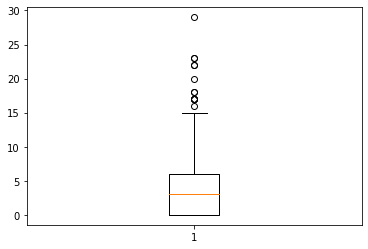

In [42]:
plt.boxplot(distro_CST)

In [55]:
distro_WPR = []
for s in range(len(sentences_reannotated_WPR)):
    index = 0
    for token in sentences_reannotated_WPR[s]:
        #print(token['form'], "=>", token['upos'])
        if token['form'].lower() == 'that':
            k = 1  # distance between 'that' and the 'noun' before it
            while True:
                if k >= len(sentences_reannotated_WPR[s]):
                    k = 0
                    break
                if (sentences_reannotated_WPR[s][index - k]['xpos'] == 'NN') or (sentences_reannotated_WPR[s][index - k]['xpos'] == 'NNS'):
                    break
                else:
                    k += 1
            if k != 0:
                distro_WPR.append(k-1)
        index += 1

{'whiskers': [<matplotlib.lines.Line2D at 0x248ba9cfd30>,
 'caps': [<matplotlib.lines.Line2D at 0x248ba9fd430>,
 'boxes': [<matplotlib.lines.Line2D at 0x248ba9cf9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x248ba9fdaf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x248ba9fde50>],
 'means': []}

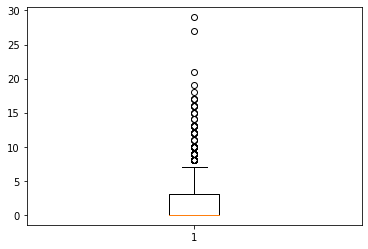

In [56]:
plt.boxplot(distro_WPR)

In [61]:
import seaborn as sns

In [57]:
labels = ['WPR' for _ in range(len(distro_WPR))]
#labels.append(['CST' for _ in range(len(distro_CST))])

In [58]:
labels = ['WPR' for _ in range(len(distro_WPR))] + ['CST' for _ in range(len(distro_CST))]

In [59]:
distro_df = pd.DataFrame({'Distance (i.e. n_tokens)': distro_WPR + distro_CST, 'Tag': labels})

<AxesSubplot:xlabel='Tag', ylabel='Distance (i.e. n_tokens)'>

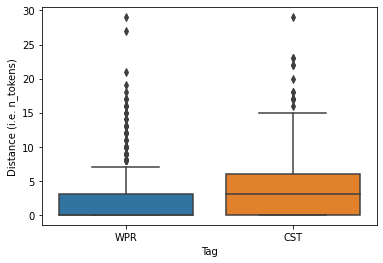

In [62]:
sns.boxplot(x = distro_df['Tag'], y=distro_df['Distance (i.e. n_tokens)'])

### Grouping the 500 training files into 5 files (respectively 100, 200, 300, 400 and 500 files per group):

In [6]:
def concat_n_first(n):
    c = 0
    with open("brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/"+str(n)+".txt", "w+", encoding="UTF-8") as grp_fo:
        for filename in os.listdir("brown_annotated/TOKEN_PER_ROW"):
            if os.path.isfile("brown_annotated/TOKEN_PER_ROW/"+filename):
                data = open("brown_annotated/TOKEN_PER_ROW/"+filename, "r", encoding="UTF-8")
                content = data.read()
                
                grp_fo.write(content)
                c += 1
                data.close()
                
                if(c == n):
                    break

In [7]:
concat_n_first(10)

In [8]:
concat_n_first(30)

In [9]:
concat_n_first(100)

In [10]:
concat_n_first(200)

In [11]:
concat_n_first(300)

In [12]:
concat_n_first(400)

In [13]:
concat_n_first(500)

### Creation of the `lexicon` file:

<u>Note:</u> 

This file (according to the documentation) has to follow some rules:

    1 - No duplication of terms.
    
    2 - All the possible XPOS tags of a term have to appear in the same row as the term.
    
    3 - It must include lemmas.

In [17]:
def lexicon_n_first(n):
    c = 0
    nb_that_reannoted = 0
    nb_that = 0
    with open("brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_"+str(n)+".txt", "w+", encoding="utf-8") as lexicon_fo:
        li = []
        li_tags = []
        li_lemma = []
        
        lexicon_dict = dict()
        for filename in os.listdir("brown_annotated/"):
            if os.path.isfile("brown_annotated/"+filename):
                data = open("brown_annotated/"+filename)
                annotations = data.read()

                sentences = conllu.parse(annotations)
                
                for i in range(len(sentences)):
                    for j in range(len(sentences[i])):
                        if(sentences[i][j]['xpos'] == 'VB' and sentences[i][j]['deprel'] == 'acl'): # précédent that à CST
                            k = j
                            while(k >= 0):
                                if(sentences[i][k]['form'].lower() == 'that' and sentences[i][k]['upos'] == 'SCONJ'):
                                    nb_that_reannoted += 1
                                    sentences[i][k]['xpos'] = "CST"
                                k -= 1
                        elif(sentences[i][j]['xpos'] == 'VB' and sentences[i][j]['deprel'] == 'acl:relcl'): # précédent that à WPR
                            k = j
                            while(k >= 0):
                                if(sentences[i][k]['form'].lower() == 'that'):
                                    nb_that_reannoted += 1
                                    sentences[i][k]['xpos'] = "WPR"
                                k -= 1
                for i in range(len(sentences)):
                    for j in range(len(sentences[i])):
                        if(sentences[i][j]['form'].lower() == 'that'):
                            nb_that += 1
                        if(sentences[i][j]['form'].lower() not in lexicon_dict):
                            lexicon_dict[sentences[i][j]['form'].lower()] = [(sentences[i][j]['xpos'] + " " + sentences[i][j]['lemma'].lower())]
                        elif((sentences[i][j]['xpos']) not in list(map(lambda x: x.split(" ")[0], lexicon_dict[sentences[i][j]['form'].lower()]))):
                            lexicon_dict[sentences[i][j]['form'].lower()].append((sentences[i][j]['xpos'] + " " + sentences[i][j]['lemma'].lower()))
                            #li.append(sentences[i][j]['form'])
                            #li_tags.append(sentences[i][j]['xpos'])
                            #li_lemma.append(sentences[i][j]['lemma'])
                c += 1
                data.close()
                if(c == n):
                    break
        for token in lexicon_dict:
            to_write = token
            for pairs in lexicon_dict[token]:
                tmp = ("\t" + pairs)
                to_write += tmp
            lexicon_fo.write(to_write + "\n")


    
        lexicon_fo.write("PDT\tPDT PDT")
        lexicon_fo.write("''\t'' ''")
        lexicon_fo.write("SYM\tSYM SYM")
        lexicon_fo.write("$\t$ $")
                    
    
    print("There are ", nb_that, "'that'")
    print("There are ", nb_that_reannoted, "'that' re-annotated")

### Creation of the grouped lexicons from the grouped files (repectively 10, 15, 20, 25 and 30 per group):

In [18]:
lexicon_n_first(10)

There are  214 'that'
There are  30 'that' re-annotated


In [19]:
lexicon_n_first(30)

There are  527 'that'
There are  41 'that' re-annotated


In [20]:
lexicon_n_first(100)

There are  2162 'that'
There are  177 'that' re-annotated


In [21]:
lexicon_n_first(200)

There are  4122 'that'
There are  308 'that' re-annotated


In [22]:
lexicon_n_first(300)

There are  6393 'that'
There are  514 'that' re-annotated


In [23]:
lexicon_n_first(400)

There are  8560 'that'
There are  674 'that' re-annotated


In [24]:
lexicon_n_first(500)

There are  10787 'that'
There are  789 'that' re-annotated


## Training:

In [25]:
!train-tree-tagger -st . brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_10.txt empty.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/10.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_10.par
!train-tree-tagger -st . brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_30.txt empty.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/30.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_30.par
!train-tree-tagger -st . brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_100.txt empty.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/100.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_100.par
!train-tree-tagger -st . brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_200.txt empty.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/200.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_200.par
!train-tree-tagger -st . brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_300.txt empty.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/300.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_300.par
!train-tree-tagger -st . brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_400.txt empty.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/400.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_400.par
!train-tree-tagger -st . brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_500.txt empty.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/500.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_500.par


train-tree-tagger -cl 2 -dtg 0.50 -sw 1.00 -ecw 0.15 -atg 1.20 brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_10.txt empty.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/10.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_10.par

	reading the lexicon ...
		reading the tagset ...
		reading the lemmas ...
		reading the entries ...
		sorting the lexicon ...
		reading the open class tags ...
	calculating tag frequencies ...

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000	making affix tree ...
prefix lexicon: 1 nodes
suffix lexicon: 1 nodes
	reading classes ...
	making ngram table ...

1000	584
2000	1042
3000	1378
4000	1624
5000	1859
6000	2070
7000	2281
8000	2491
9000	2687
10000	2817
11000	2991
12000	3114
13000	3231
14000	3363
15000	3470
16000	3578
17000	3688
18000	3813
19000	3910
20000	3988
21000	4087
22000	4191
23000	4318
23027	4320
finished.
	making decision tree ...

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
2

### Tokenization of the test sets `RRC` et `NCC` and transform into the token per row format:

In [57]:
with open("testing_sets/NCC_CLEAN.txt", "r", encoding="utf-8") as fo:
    content = fo.read()
    tokens = content.split(" ")
    with open("testing_sets/NCC_tokenized.txt", "w+", encoding="utf-8") as fo_tokenized:
        for token in tokens:
            fo_tokenized.write(token + "\n")

In [58]:
with open("testing_sets/RRC_CLEAN.txt", "r", encoding="utf-8") as fo:
    content = fo.read()
    tokens = content.split(" ")
    with open("testing_sets/RRCutf8_tokenized.txt", "w+", encoding="utf-8") as fo_tokenized:
        for token in tokens:
            fo_tokenized.write(token + "\n")

## Testing:

### <u>On the RRC dataset</u>:

In [59]:
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_10.par testing_sets/RRCutf8_tokenized.txt RESULTS_RRC/results_10.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_30.par testing_sets/RRCutf8_tokenized.txt RESULTS_RRC/results_30.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_100.par testing_sets/RRCutf8_tokenized.txt RESULTS_RRC/results_100.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_200.par testing_sets/RRCutf8_tokenized.txt RESULTS_RRC/results_200.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_300.par testing_sets/RRCutf8_tokenized.txt RESULTS_RRC/results_300.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_400.par testing_sets/RRCutf8_tokenized.txt RESULTS_RRC/results_400.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_500.par testing_sets/RRCutf8_tokenized.txt RESULTS_RRC/results_500.txt

	reading parameters ...
	tagging ...

1000
2000
3000
4000	 finished.
	reading parameters ...
	tagging ...

1000
2000
3000
4000	 finished.
	reading parameters ...
	tagging ...

1000
2000
3000
4000	 finished.
	reading parameters ...
	tagging ...

1000
2000
3000
4000	 finished.
	reading parameters ...
	tagging ...

1000
2000
3000
4000	 finished.
	reading parameters ...
	tagging ...

1000
2000
3000
4000	 finished.
	reading parameters ...
	tagging ...

1000
2000
3000
4000	 finished.


### <u>NCC dataset</u>:

In [60]:
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_10.par testing_sets/NCC_tokenized.txt RESULTS_NCC/results_10.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_30.par testing_sets/NCC_tokenized.txt RESULTS_NCC/results_30.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_100.par testing_sets/NCC_tokenized.txt RESULTS_NCC/results_100.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_200.par testing_sets/NCC_tokenized.txt RESULTS_NCC/results_200.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_300.par testing_sets/NCC_tokenized.txt RESULTS_NCC/results_300.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_400.par testing_sets/NCC_tokenized.txt RESULTS_NCC/results_400.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_500.par testing_sets/NCC_tokenized.txt RESULTS_NCC/results_500.txt

	reading parameters ...
	tagging ...

1000
2000
3000
4000	 finished.
	reading parameters ...
	tagging ...

1000
2000
3000
4000	 finished.
	reading parameters ...
	tagging ...

1000
2000
3000
4000	 finished.
	reading parameters ...
	tagging ...

1000
2000
3000
4000	 finished.
	reading parameters ...
	tagging ...

1000
2000
3000
4000	 finished.
	reading parameters ...
	tagging ...

1000
2000
3000
4000	 finished.
	reading parameters ...
	tagging ...

1000
2000
3000
4000	 finished.


## Compute the accuracy:

### <u>RRC:</u>

In [2]:
path = "RESULTS_RRC/"
nbr = [10, 30, 100, 200, 300, 400, 500]
#nbr = [100, 200, 300, 400, 500]
n_results = {}

for n in nbr:
    with open(path + "results_" + str(n) + ".txt", "r", encoding="UTF-8") as fo:
        content = fo.read()
        tmp = {
        'n_WPR' : content.count("that\tWPR"),
        'n_WDT' : content.count("that\tWDT"),
        'n_CST' : content.count("that\tCST"),
        'n_IN' : content.count("that\tIN"),
        'n_CJT' : content.count("that\tCJT"),
        'n_DT' : content.count("that\tDT")
        }
    n_results[str(n)] = tmp
    

The WPR tag is equivalent to the WDT so we consider them the same.

As explained before, we suppose that the UDpipe gives a correct deprel. There is probably some mistakes which are described as `IN` tag.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

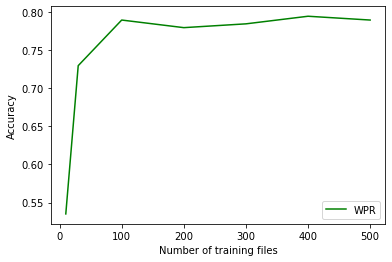

In [4]:
accuracy_rcc = [(v['n_WPR'] + v['n_WDT'])/200 for k, v in n_results.items()]
plt.plot(nbr, accuracy_rcc, "g", label="WPR")
plt.xlabel("Number of training files")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("WPR_accuracy.png")

### Confusion Matrix:

In [361]:
fo = open("RRC_GOLD.txt", encoding="utf-8", mode="r")
content = fo.read()
fo.close()
tokens = content.split(" ")

In [362]:
that_positions = []
for token in tokens:
    elts = token.split("|")
    if elts[0].lower() == "that":
        that_positions.append(elts[1])

In [14]:
from sklearn import metrics

In [366]:
that_pos_files = {}
cm_files = {}
for i in [10, 30, 100, 200, 300, 400, 500]:
    fo = open("RESULTS_RRC/results_"+str(i)+".txt", encoding="utf-8", mode="r")
    content = fo.read()
    fo.close()
    tokens_treetagger = content.split("\n")
    
    that_positions_tt = []
    for token in tokens_treetagger:
        elts = token.split("\t")
        if elts[0].lower() == "that":
            that_positions_tt.append(elts[1])
    that_pos_files[str(i)] = that_positions_tt
    cm_files[str(i)] = metrics.confusion_matrix(that_positions, that_positions_tt, labels=['CST', 'DT', 'IN', 'WDT', 'WPR'])

10
30
100
200
300
400
500


<Figure size 864x576 with 0 Axes>

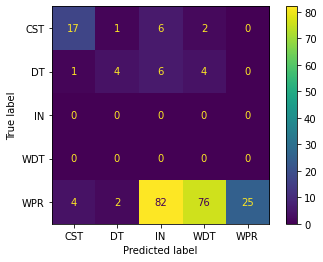

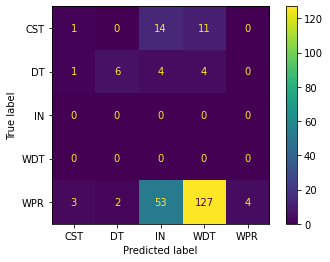

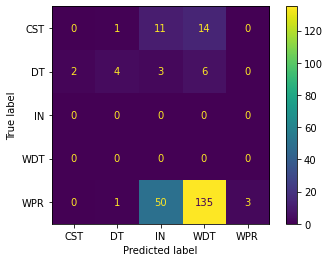

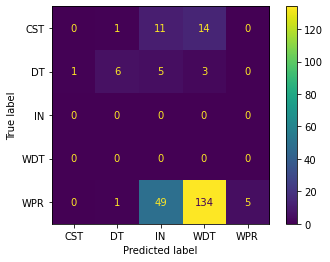

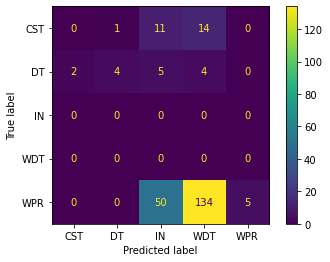

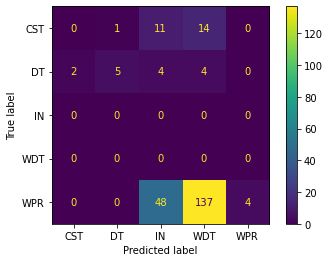

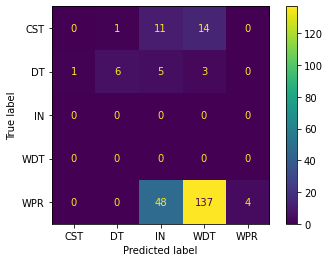

In [368]:
li = [10, 30, 100, 200, 300, 400, 500]
plt.figure(figsize=(12, 8))
for i in range(7):
    metrics.ConfusionMatrixDisplay(cm_files[str(li[i])], display_labels=['CST', 'DT', 'IN', 'WDT', 'WPR']).plot()

#### Print the sentences where `that` annotation is wrong: 

In [374]:
that_positions_tt = that_pos_files['100']

In [375]:
fo = open("testing_sets/RRC_CLEAN.conllu", mode="r")
annotations = fo.read()
fo.close()
sentences = conllu.parse(annotations)

In [376]:
idx_sents = []
for i in range(len(sentences)):
    c_that = sentences[i].metadata['text'].count("that")
    k = 1
    while(k <= c_that):
        idx_sents.append((i, k, c_that))
        k += 1

In [377]:
i = 0
wrong_sents = []
while i < len(that_positions):
    id_sent = idx_sents[i][0]
    pos_that_in_sent = idx_sents[i][1]
    nb_that = idx_sents[i][2]
    text = sentences[id_sent].metadata['text']
    text = text.split(" ")
    k = i
    indices_that_in_sent = [ind for ind, x in enumerate(text) if "that" == x.lower()]
    while k < (i + nb_that):
        if not((that_positions[k] == "WPR" and that_positions_tt[k] == "WDT") or (that_positions_tt[k] == "WPR" and that_positions[k] == "WDT")):
            if that_positions[k] != that_positions_tt[k]:
                text[indices_that_in_sent[k-i]] = (text[indices_that_in_sent[k-i]] + "|" + that_positions_tt[k] + "|" + that_positions[k])

        k += 1
    sentences[id_sent].metadata['text'] = " ".join(text)
    i = k
    if nb_that == 0:
        i += 1

In [378]:
with open("wrong_that_sentences_RRC.txt", mode="w+", encoding="utf-8") as fo:
    fo.writelines(list(map(lambda x: x.metadata['text']+"\n\n", sentences)))

### <u>NCC:</u>

In [1]:
path = "RESULTS_NCC/"
nbr = [10, 30, 100, 200, 300, 400, 500]
n_results = {}

for n in nbr:
    with open(path + "results_" + str(n) + ".txt", "r", encoding="UTF-8") as fo:
        content = fo.read()
        tmp = {
        'n_WPR' : content.count("that\tWPR"),
        'n_WDT' : content.count("that\tWDT"),
        'n_CST' : content.count("that\tCST"),
        'n_IN' : content.count("that\tIN"),
        'n_CJT' : content.count("that\tCJT"),
        'n_DT' : content.count("that\tDT")
        }
    n_results[str(n)] = tmp

There is a lot of noise (see `DT` tag), this may be du to the fact that there are a lot of *that*s that aren't considered as **acl** by the UDpipe. 

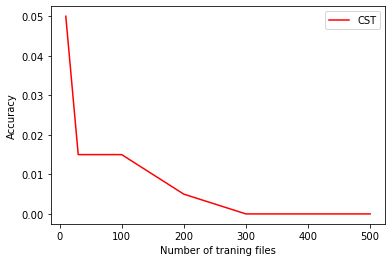

In [5]:
accuracy_ncc = [(v['n_CST'])/200 for k, v in n_results.items()]
plt.plot(nbr, accuracy_ncc, 'r', label="CST")
plt.xlabel("Number of traning files")
plt.ylabel("Accuracy")
plt.legend()

Text(0, 0.5, 'Number of IN')

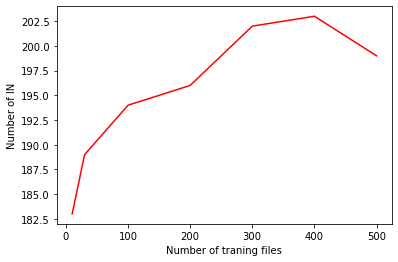

In [6]:
accuracy_ncc = [(v['n_IN']) for k, v in n_results.items()]
plt.plot(nbr, accuracy_ncc, 'r')
plt.xlabel("Number of traning files")
plt.ylabel("Number of IN")

### Confusion Matrix:

In [12]:
fo = open("RRC_GOLD.txt", encoding="utf-8", mode="r")
content = fo.read()
fo.close()
tokens = content.split(" ")

that_positions = []
for token in tokens:
    elts = token.split("|")
    if elts[0].lower() == "that":
        that_positions.append(elts[1])

fo = open("RESULTS_RRC/results_100.txt", encoding="utf-8", mode="r")
content = fo.read()
fo.close()
tokens_treetagger = content.split("\n")

that_positions_tt = []
for token in tokens_treetagger:
    elts = token.split("\t")
    if elts[0].lower() == "that":
        that_positions_tt.append(elts[1])

<Figure size 864x576 with 0 Axes>

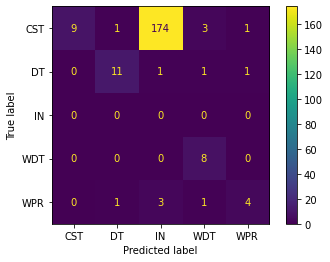

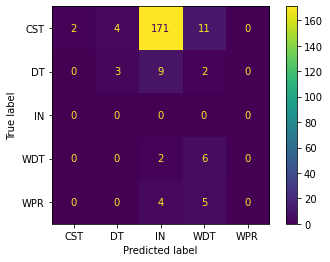

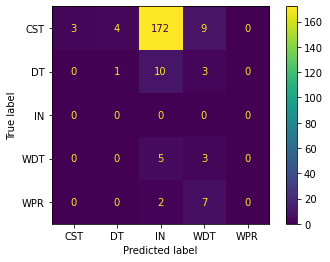

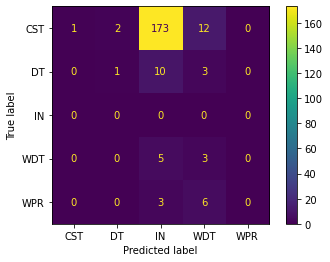

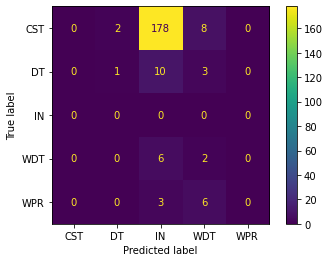

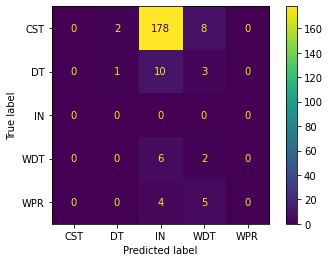

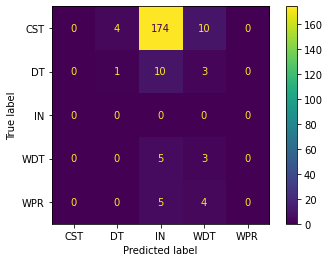

In [9]:
# We compute the confusion matrix for each of the NCC results with 10, 30, 100, 200, 300, 400 and 500 files
fo = open("NCC_GOLD.txt", encoding="utf-8", mode="r")
content = fo.read()
fo.close()
tokens = content.split(" ")

that_positions = []
for token in tokens:
    elts = token.split("|")
    if elts[0].lower() == "that":
        that_positions.append(elts[1])

that_pos_files = {}
cm_files = {}
for i in [10, 30, 100, 200, 300, 400, 500]:
    fo = open("RESULTS_NCC/results_"+str(i)+".txt", encoding="utf-8", mode="r")
    content = fo.read()
    fo.close()
    tokens_treetagger = content.split("\n")
    
    that_positions_tt = []
    for token in tokens_treetagger:
        elts = token.split("\t")
        if elts[0].lower() == "that":
            that_positions_tt.append(elts[1])
    that_pos_files[str(i)] = that_positions_tt
    cm_files[str(i)] = metrics.confusion_matrix(that_positions, that_positions_tt, labels=['CST', 'DT', 'IN', 'WDT', 'WPR'])

li = [10, 30, 100, 200, 300, 400, 500]
plt.figure(figsize=(12, 8))
for i in range(7):
    metrics.ConfusionMatrixDisplay(cm_files[str(li[i])], display_labels=['CST', 'DT', 'IN', 'WDT', 'WPR']).plot()

In [10]:
# we consider 100 training files as it produces the best accuracy for the NCC test data
that_positions_tt = that_pos_files['500']

#### Print the sentences where `that` annotation is wrong: 

In [16]:
def countnonoverlappingrematches(pattern, thestring):
    return re.subn(pattern, '', thestring)[1]

In [29]:
fo = open("testing_sets/NCC_CLEAN.conllu", mode="r")
annotations = fo.read()
fo.close()
sentences = conllu.parse(annotations)

idx_sents = []
for i in range(len(sentences)):
    c_that = sentences[i].metadata['text'].count("that")
    k = 1
    while(k <= c_that):
        idx_sents.append((i, k, c_that))
        k += 1
        
i = 0
wrong_sents = []
while i < len(that_positions):
    id_sent = idx_sents[i][0]
    pos_that_in_sent = idx_sents[i][1]
    nb_that = idx_sents[i][2]
    text = sentences[id_sent].metadata['text']
    text = text.split(" ")
    k = i
    indices_that_in_sent = [ind for ind, x in enumerate(text) if "that" in x.lower()]
    while k < (i + nb_that):
        if not((that_positions[k] == "WPR" and that_positions_tt[k] == "WDT") or (that_positions_tt[k] == "WPR" and that_positions[k] == "WDT")):
#            if that_positions[k] != that_positions_tt[k]:
                text[indices_that_in_sent[k-i]] = (text[indices_that_in_sent[k-i]] + "|" + that_positions_tt[k] + "|" + that_positions[k])

        k += 1
    sentences[id_sent].metadata['text'] = " ".join(text)
    i = k
    if nb_that == 0:
        i += 1
        
with open("wrong_that_sentences_NCC.txt", mode="w+", encoding="utf-8") as fo:
    fo.writelines(list(map(lambda x: "" if countnonoverlappingrematches(r"that\|WDT\|[^WDT ]+", x.metadata['text']) == 0 else x.metadata['text']+"\n\n", sentences)))

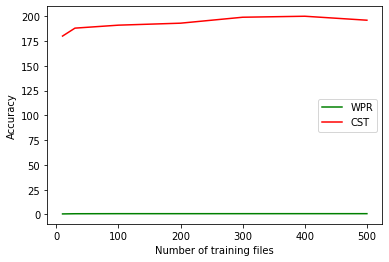

In [95]:
plt.plot(nbr, accuracy_rcc, 'g', label="WPR")
plt.plot(nbr, accuracy_ncc, 'r', label="CST")
plt.xlabel("Number of training files")
plt.ylabel("Accuracy")
plt.legend()